In [318]:
import pandas as pd
import numpy as np
import math

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from prettytable import PrettyTable

from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

from imblearn.over_sampling import SMOTE

#Supress warnings and default INFO logging
import warnings
warnings.filterwarnings('ignore')

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

%matplotlib inline


import seaborn as sns
sns.set()

### Please note this notebook is only ment for experimenting with different preprocessing methods and model selection.  Kindly refer the _code_ folder for the end-to-end application

In [319]:
# !pip install imblearn

In [320]:
filepath = "./data/TrainingSet.csv"
df = pd.read_csv(filepath)

In [321]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V211,V212,V213,V214,V215,V216,V217,V218,V219,Machine_State
0,NaN,5.135988,5.0000,5.28125,0.058368,2059.53125,0.109375,NaN,5.135988,5.0000,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Good
1,NaN,5.908042,5.7500,6.09375,0.063232,2369.12500,0.109375,NaN,5.908042,5.7500,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,Good
2,0.00000,9.244870,0.1875,13.75000,3.890521,3707.19305,12.912530,0.00000,9.244870,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
3,0.19375,18.247452,1.4375,20.25000,3.328545,7317.22805,14.437520,0.19375,18.247452,1.4375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good
4,0.19375,21.642090,1.4375,25.59380,6.094741,8678.47815,21.615660,0.19375,21.642090,1.4375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Good


# Part A: Preprocessing

In [322]:
df = df.fillna(0)

In [323]:
df['Machine_State'].unique()

array(['Good', 'Bad', 0], dtype=object)

In [324]:
x = pd.DataFrame(df.dtypes).T
x.to_csv('./feature_file.csv')

In [325]:
print("Total number of data samples belonging to type 0 =", len(df[df['Machine_State']==0]))
print("Total number of data samples belonging to type Good =",len(df[df['Machine_State']=='Good']))
print("Total number of data samples belonging to type Bad =",len(df[df['Machine_State']=='Bad']))

Total number of data samples belonging to type 0 = 19
Total number of data samples belonging to type Good = 3240
Total number of data samples belonging to type Bad = 463


**Clearly the given data is imbalanced.**

In [326]:
# Drop the rows that belong to undefined class
data = df[df['Machine_State']!=0]

In [327]:
data['Machine_State'].unique()

array(['Good', 'Bad'], dtype=object)

In [328]:
data["Machine_State"].replace({"Good": 0, "Bad": 1}, inplace=True)

In [329]:
data.drop_duplicates(inplace=True)

In [330]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V211,V212,V213,V214,V215,V216,V217,V218,V219,Machine_State
0,0.00000,5.135988,5.0000,5.28125,0.058368,2059.53125,0.109375,0.00000,5.135988,5.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.00000,5.908042,5.7500,6.09375,0.063232,2369.12500,0.109375,0.00000,5.908042,5.7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.00000,9.244870,0.1875,13.75000,3.890521,3707.19305,12.912530,0.00000,9.244870,0.1875,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.19375,18.247452,1.4375,20.25000,3.328545,7317.22805,14.437520,0.19375,18.247452,1.4375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.19375,21.642090,1.4375,25.59380,6.094741,8678.47815,21.615660,0.19375,21.642090,1.4375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [331]:
X = data.drop('Machine_State', axis=1)
y = data['Machine_State']

In [332]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. Upsampling of data

In [333]:
# upsampling the data 
sm = SMOTE(random_state=2)
X_up, y_up = sm.fit_sample(X_scaled, y)

In [334]:
print("Total number of data samples belonging to type Good =",y_up.value_counts()[0])
print("Total number of data samples belonging to type Bad =",y_up.value_counts()[1])

Total number of data samples belonging to type Good = 3229
Total number of data samples belonging to type Bad = 3229


In [335]:
X_train_up, X_val_up, y_train_up, y_val_up = train_test_split(X_up,y_up,test_size=0.2,random_state=66,shuffle=True)

## 2. Random upsampling + downsampling

In [336]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [337]:
# define oversampling strategy
over_sample = RandomOverSampler(sampling_strategy=0.2)
X_over, y_over = over_sample.fit_resample(X, y)

under_sample = RandomUnderSampler(sampling_strategy=0.5)
# fit and apply the transform
X_under, y_under = under_sample.fit_resample(X_over, y_over)

**Original data distribution**

In [338]:
print("Total number of data samples belonging to type Good =",y.value_counts()[0])
print("Total number of data samples belonging to type Bad =",y.value_counts()[1])

Total number of data samples belonging to type Good = 3229
Total number of data samples belonging to type Bad = 463


**Data distribution after random oversampling** 

In [339]:
print("Total number of data samples belonging to type Good =",y_over.value_counts()[0])
print("Total number of data samples belonging to type Bad =",y_over.value_counts()[1])

Total number of data samples belonging to type Good = 3229
Total number of data samples belonging to type Bad = 645


**Data distribution after random oversampling + random undersampling** 

In [340]:
print("Total number of data samples belonging to type Good =",y_under.value_counts()[0])
print("Total number of data samples belonging to type Bad =",y_under.value_counts()[1])

Total number of data samples belonging to type Good = 1290
Total number of data samples belonging to type Bad = 645


## 3. Feature selection

In [341]:
fs = SelectKBest(score_func=f_classif, k=150)
# apply feature selection
X_selected = fs.fit_transform(X_under, y_under)

In [342]:
# Top 5 features
fs_top5 = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
top5 = fs_top5.fit_transform(X_under, y_under)

# Part B: Model selection

### Note:
#### True positive = Bad device correctly classified as bad
#### True negative = Good device correctly classified as good

## 1. Logistic regression

### 1.1 With 80-20 split

In [343]:
X_train_up, X_val_up, y_train_up, y_val_up = train_test_split(X_up,y_up,test_size=0.2,random_state=66,shuffle=True)

logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

logreg.fit(X_train_up,y_train_up)
y_val_pred = logreg.predict(X_val_up)

In [344]:
def evaluating_metrics(y_val, y_val_pred, model_name):
    # In the above case since false negatives have higher penaltly, we need to maximize recall value. 
    # This can be best measured using F2 score

    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f2_score = fbeta_score(y_val, y_val_pred, beta=2.0)
    print('Result for %s: precision=%.3f, recall=%.3f, f2_score=%.3f' % (model_name, precision, recall, f2_score))

In [345]:
def visualize(conf_matrix, model_name):
    fig, axes = plt.subplots(1,1,figsize=(10,6))

    df_cm = pd.DataFrame(conf_matrix, index = ['Good','Bad'],columns = ['Predicted Good','Predicted Bad'])
    
    sns.set(font_scale=1.3)
    sns.heatmap(df_cm.iloc[-1::-1,:], annot=True,fmt= 'g', ax = axes)
    axes.set_ylim([0,2]);
    axes.set_title(f'{model_name} Classifier Confusion Matrix')

In [346]:
model_name='Logistic regression'
evaluating_metrics(y_val_up, y_val_pred, model_name)

Result for Logistic regression: precision=0.828, recall=0.919, f2_score=0.899


### 1.2 With cross validation

In [347]:
from sklearn.metrics import make_scorer

In [348]:
def cross_validation(estimator, X, y, scoring, cv, return_train_score=False):
    scores = cross_validate(estimator, X, y, scoring=scoring, cv=cv, return_train_score=return_train_score, n_jobs=-1)
    print('Average test f2 score in 10 fold cross validation = %.2f'%(scores['test_f2_score'].mean()))
    return scores['test_f2_score'].mean()

In [349]:
#CV with upsampling
scorer  = {'f2_score': make_scorer(fbeta_score, beta=2)}
logreg_cv_up = cross_validation(logreg, X_up, y_up, scoring=scorer, cv=10, return_train_score=True)

Average test f2 score in 10 fold cross validation = 0.89


**Just using the upsampled data might overfit the model, since most of the minority class data is repeated hence use random upsampling + downsampling**

### 1.3 With random upsample + random downsampled data 

In [350]:
#CV with upsampling
logreg_cv_up = cross_validation(logreg, X_under, y_under, scoring=scorer, cv=10, return_train_score=True)

Average test f2 score in 10 fold cross validation = 0.54


### 1.4 With feature selection 

In [353]:
#CV with upsampling
logreg_cv_up = cross_validation(logreg, X_selected, y_under, scoring=scorer, cv=10, return_train_score=True)

Average test f2 score in 10 fold cross validation = 0.49


In [354]:
f2_score_comparision = PrettyTable()
f2_score_comparision.field_names = ["Model", "f2_score"]

In [355]:
f2_score_comparision.add_row(["Logistic Regression", logreg_cv_up])

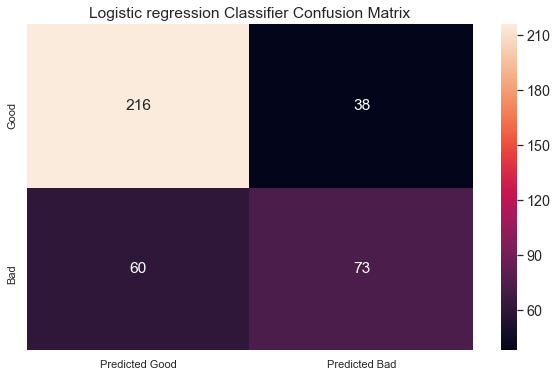

In [356]:
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected ,y_under, test_size=0.2,random_state=66,shuffle=True)

logreg.fit(X_train_selected, y_train_selected)
y_val_pred = logreg.predict(X_val_selected)

# Confusion matriz
logreg_cm = confusion_matrix(y_val_selected, y_val_pred)
visualize(logreg_cm, model_name)  

In [357]:
cost_comparision = PrettyTable()
cost_comparision.field_names = ["Model","With FP Cost 500", "With FP Cost 5000"]

In [358]:
FP_cost = 500
FN_cost = 5000
cost1 = (logreg_cm[0][1]*FP_cost)+(logreg_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 319000


In [359]:
FP_cost = 5000
FN_cost = 5000
cost2 = (logreg_cm[0][1]*FP_cost)+(logreg_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 490000


In [360]:
cost_comparision.add_row(["Logistic Regression", cost1, cost2])

## 2. Random forest

In [361]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

### 2.1 With 80-20 split

In [362]:
X_train_up, X_val_up, y_train_up, y_val_up = train_test_split(X_up,y_up,test_size=0.2,random_state=66,shuffle=True)

rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
rf_model.fit(X_train_up,y_train_up)
y_val_pred = rf_model.predict(X_val_up)

In [363]:
model_name = 'Random Forest'
evaluating_metrics(y_val_up, y_val_pred, model_name)

Result for Random Forest: precision=0.977, recall=0.986, f2_score=0.984


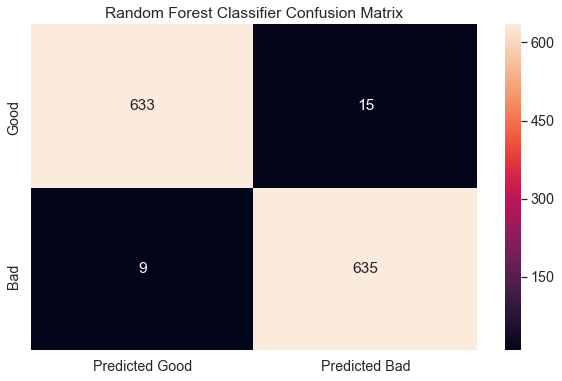

In [364]:
# Confusion matriz
rf_model_cm = confusion_matrix(y_val_up, y_val_pred)
visualize(rf_model_cm, model_name)    

In [365]:
FP_cost = 500
FN_cost = 5000
cost1 = (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 52500


In [366]:
FP_cost = 5000
FN_cost = 5000
cost2 = (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 120000


### 2.2 With cross validation

### i) RandomForestClassifier

In [367]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# CV with upsampling
random_forest_cv = cross_validation(rf_model, X_up, y_up, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.99


In [368]:
rf_model.fit(X_train_up, y_train_up)
y_val_pred = rf_model.predict(X_val_up)

# Confusion matriz
rf_model_cm = confusion_matrix(y_val_up, y_val_pred)

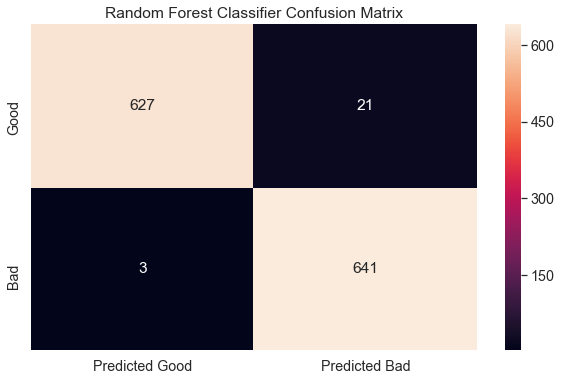

In [369]:
model_name = 'Random Forest'
visualize(rf_model_cm, model_name)    

In [370]:
FP_cost = 500
FN_cost = 5000
print("Cost of misclassification = USD", (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost))

Cost of misclassification = USD 25500


In [371]:
FP_cost = 5000
FN_cost = 5000
print("Cost of misclassification with new False Positive cost = USD", (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost))

Cost of misclassification with new False Positive cost = USD 120000


### ii) BalancedRandomForestClassifier

In [372]:
# Balanced Random forest
rf_model_2 = BalancedRandomForestClassifier(n_estimators=100)
random_forest_balanced_cv = cross_validation(rf_model_2, X_up, y_up, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.99


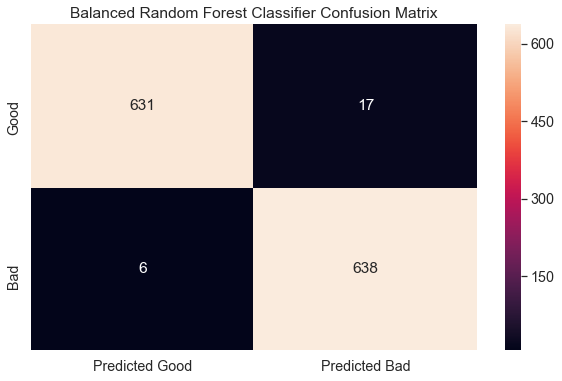

In [373]:
model_name = 'Balanced Random Forest'
rf_model_2.fit(X_train_up, y_train_up)
y_val_pred = rf_model_2.predict(X_val_up)

# Confusion matriz
rf_model_2_cm = confusion_matrix(y_val_up, y_val_pred)
visualize(rf_model_2_cm, model_name)   

In [374]:
FP_cost = 500
FN_cost = 5000
print("Cost of misclassification = USD", (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost))

Cost of misclassification = USD 38500


In [375]:
FP_cost = 5000
FN_cost = 5000
print("Cost of misclassification with new False Positive cost = USD", (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost))

Cost of misclassification with new False Positive cost = USD 115000


**Just using the upsampled data might overfit the model, since most of the minority class data is repeated hence use random upsampling + downsampling**

### 2.3 With random upsample + random downsampled data 

### i) RandomForestClassifier

In [376]:
# Random forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
random_forest_cv = cross_validation(rf_model, X_under, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.86


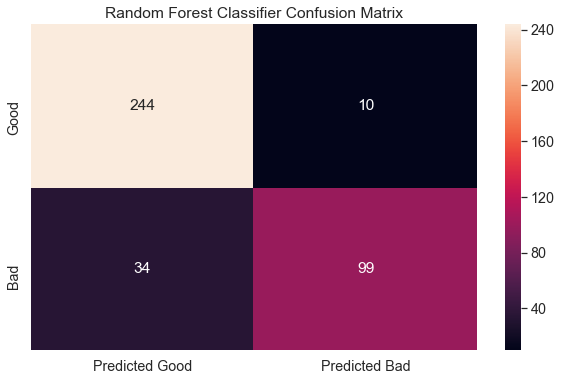

In [377]:
model_name = 'Random Forest'
X_train_under, X_val_under, y_train_under, y_val_under = train_test_split(X_under ,y_under, test_size=0.2,random_state=66,shuffle=True)

rf_model.fit(X_train_under, y_train_under)
y_val_pred = rf_model.predict(X_val_under)

# Confusion matriz
rf_model_cm = confusion_matrix(y_val_under, y_val_pred)
visualize(rf_model_cm, model_name) 

In [378]:
FP_cost = 500
FN_cost = 5000
print("Cost of misclassification = USD", (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost))

Cost of misclassification = USD 175000


In [379]:
FP_cost = 5000
FN_cost = 5000
print("Cost of misclassification with new False Positive cost = USD", (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost))

Cost of misclassification with new False Positive cost = USD 220000


### ii) BalancedRandomForestClassifier

In [380]:
# Balanced Random forest
rf_model_2 = BalancedRandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
random_forest_balanced_cv = cross_validation(rf_model_2, X_under, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.91


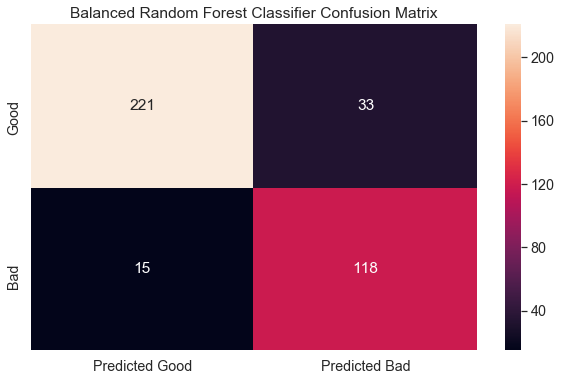

In [381]:
model_name = 'Balanced Random Forest'
rf_model_2.fit(X_train_under, y_train_under)
y_val_pred = rf_model_2.predict(X_val_under)

# Confusion matriz
rf_model_2_cm = confusion_matrix(y_val_under, y_val_pred)
visualize(rf_model_2_cm, model_name) 

In [382]:
FP_cost = 500
FN_cost = 5000
print("Cost of misclassification = USD", (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost))

Cost of misclassification = USD 91500


In [383]:
FP_cost = 5000
FN_cost = 5000
print("Cost of misclassification with new False Positive cost = USD", (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost))

Cost of misclassification with new False Positive cost = USD 240000


### 1.4 With feature selection 

### i) RandomForestClassifier

In [384]:
# Random forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample')
random_forest_cv = cross_validation(rf_model, X_selected, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.85


In [385]:
f2_score_comparision.add_row(["Random Forest", random_forest_cv])

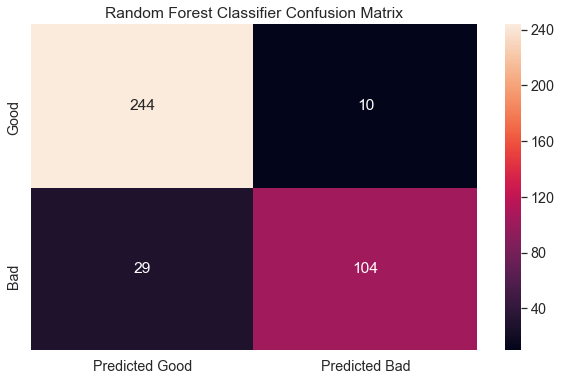

In [386]:
model_name = 'Random Forest'
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected ,y_under, test_size=0.2,random_state=66,shuffle=True)

rf_model.fit(X_train_selected, y_train_selected)
y_val_pred = rf_model.predict(X_val_selected)

# Confusion matriz
rf_model_cm = confusion_matrix(y_val_selected, y_val_pred)
visualize(rf_model_cm, model_name) 

In [387]:
FP_cost = 500
FN_cost = 5000
cost1 = (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 150000


In [388]:
FP_cost = 5000
FN_cost = 5000
cost2 = (rf_model_cm[0][1]*FP_cost)+(rf_model_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 195000


In [389]:
cost_comparision.add_row(["Random Forest", cost1, cost2])

### ii) BalancedRandomForestClassifier

In [390]:
# Balanced Random forest
rf_model_2 = BalancedRandomForestClassifier(n_estimators=100)
random_forest_balanced_cv = cross_validation(rf_model_2, X_selected, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.90


In [391]:
f2_score_comparision.add_row(["Balanced Random Forest", random_forest_balanced_cv])

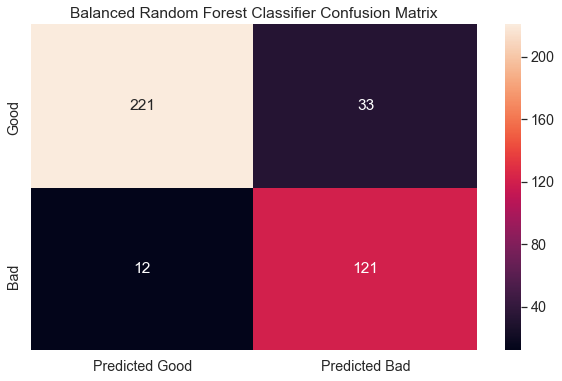

In [392]:
model_name = 'Balanced Random Forest'
rf_model_2.fit(X_train_selected, y_train_selected)
y_val_pred = rf_model_2.predict(X_val_selected)

# Confusion matriz
rf_model_2_cm = confusion_matrix(y_val_selected, y_val_pred)
visualize(rf_model_2_cm, model_name) 

In [393]:
FP_cost = 500
FN_cost = 5000
cost1 = (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 76500


In [394]:
FP_cost = 5000
FN_cost = 5000
cost2 = (rf_model_2_cm[0][1]*FP_cost)+(rf_model_2_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 225000


In [395]:
cost_comparision.add_row(["Balanced Random Forest", cost1, cost2])

## 3. Ada Boost

In [396]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [397]:
ad_model = AdaBoostClassifier(n_estimators=1000)
ada_boost_cv = cross_validation(ad_model, X_selected, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.86


In [399]:
f2_score_comparision.add_row(["Ada Boost", ada_boost_cv])

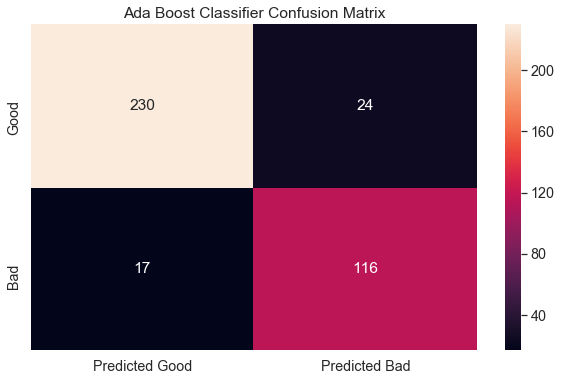

In [400]:
model_name = 'Ada Boost'
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected ,y_under, test_size=0.2,random_state=66,shuffle=True)

ad_model.fit(X_train_selected, y_train_selected)
y_val_pred = ad_model.predict(X_val_selected)

# Confusion matriz
ad_model_cm = confusion_matrix(y_val_selected, y_val_pred)
visualize(ad_model_cm, model_name) 

In [401]:
FP_cost = 500
FN_cost = 5000
cost1 = (ad_model_cm[0][1]*FP_cost)+(ad_model_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 97000


In [402]:
FP_cost = 5000
FN_cost = 5000
cost2 = (ad_model_cm[0][1]*FP_cost)+(ad_model_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 205000


In [403]:
cost_comparision.add_row(["Ada Boost", cost1, cost2])

## 4. Gradient Boost

In [404]:
gb_model = GradientBoostingClassifier(n_estimators=1000)
gb_cv = cross_validation(gb_model, X_selected, y_under, scoring=scorer, cv=cv)

Average test f2 score in 10 fold cross validation = 0.90


In [405]:
f2_score_comparision.add_row(["Gradient Boost", gb_cv])

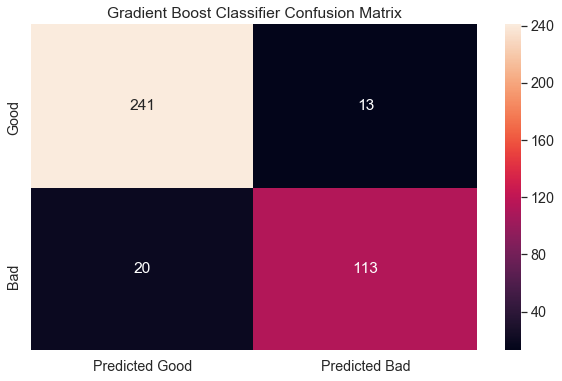

In [406]:
model_name = 'Gradient Boost'
X_train_selected, X_val_selected, y_train_selected, y_val_selected = train_test_split(X_selected ,y_under, test_size=0.2,random_state=66,shuffle=True)

gb_model.fit(X_train_selected, y_train_selected)
y_val_pred = gb_model.predict(X_val_selected)

# Confusion matriz
gb_model_cm = confusion_matrix(y_val_selected, y_val_pred)
visualize(gb_model_cm, model_name) 

In [407]:
FP_cost = 500
FN_cost = 5000
cost1 = (gb_model_cm[0][1]*FP_cost)+(gb_model_cm[1][0]*FN_cost)
print("Cost of misclassification = USD", cost1)

Cost of misclassification = USD 106500


In [408]:
FP_cost = 5000
FN_cost = 5000
cost2 = (gb_model_cm[0][1]*FP_cost)+(gb_model_cm[1][0]*FN_cost)
print("Cost of misclassification with new False Positive cost = USD", cost2)

Cost of misclassification with new False Positive cost = USD 165000


In [409]:
cost_comparision.add_row(["Gradient Boost", cost1, cost2])

# Part 3: Conclusion

In [411]:
print("F2 Scores with feature selection")
print(f2_score_comparision)
print()
print("Misclassification costs (in USD) with feature selection")
print(cost_comparision)

F2 Scores with feature selection
+------------------------+---------------------+
|         Model          |       f2_score      |
+------------------------+---------------------+
|  Logistic Regression   | 0.49480272531817315 |
|     Random Forest      |  0.8470182161635861 |
| Balanced Random Forest |  0.9007921955076313 |
|       Ada Boost        |  0.8575334507587633 |
|     Gradient Boost     |  0.9032603757462885 |
+------------------------+---------------------+

Misclassification costs (in USD) with feature selection
+------------------------+------------------+-------------------+
|         Model          | With FP Cost 500 | With FP Cost 5000 |
+------------------------+------------------+-------------------+
|  Logistic Regression   |      319000      |       490000      |
|     Random Forest      |      150000      |       195000      |
| Balanced Random Forest |      76500       |       225000      |
|       Ada Boost        |      97000       |       205000      |
|     G

- **When cost of classifying good product as bad is 500**

Clearly **BalancedRandomForestClassifier** with selected features seems to be performing the best interms of f2 score, time for training and cost for misclassification


- **When cost of classifying good product as bad is 5000**

Clearly **Gradient Boost Classifier** with selected features seems to be performing the best interms of f2 score and cost for misclassification

## TODO
1. ~Upsampling + downsampling~ 
2. ~Feature selection with L1 or t-test~
3. ~Standardization of data~ 
4. ~Visualize~
5. ~Try Ada boosting and gradient boosting~
6. ~API endpoint~ 
7. ~Document~ 
8. ~Upload on git~
9. ~What will change in your model if the cost of testing a good device was $5000?~
